# AI-generated exploratory notebook for Dandiset 001335

**DISCLAIMER**: This notebook was auto-generated using `dandi-notebook-gen` (AI) and **has not been fully verified**. Use caution when interpreting code or results, and consider this notebook primarily as a starting point for your analyses.

---

# Dandiset 001335: Neuropixels Recordings from Hippocampus of head-fixed mice during odor presentation

**Description**: Head-fixed wild type mice were presented with various odor sequences, as neural activity was recorded from hippocampus using Neuropixels probes.

**Contributors**: Mohapatra, Manish; Halchenko, Yaroslav

**Date Created**: 2025-02-14

**License**: CC-BY-4.0

**Citation**:
*Mohapatra, Manish; Halchenko, Yaroslav (2025) Neuropixels Recordings from Hippocampus of head-fixed mice during odor presentation (Version draft) [Data set]. DANDI Archive.* https://dandiarchive.org/dandiset/001335/draft

---

## 1. Setup
This notebook relies on PyNWB, h5py, remfile, matplotlib, seaborn, and the DANDI Python client.

Please ensure they are installed (`pip install pynwb h5py remfile matplotlib seaborn dandi`)

Imports and some matplotlib style:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import pynwb
import h5py
import remfile
from dandi.dandiapi import DandiAPIClient

sns.set_theme()

## 2. List all assets in Dandiset via DANDI API

In [2]:
client = DandiAPIClient()
dandiset = client.get_dandiset("001335")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in Dandiset 001335:")
for asset in assets:
    print(asset.path)

Found 1 assets in Dandiset 001335:
sub-M541/sub-M541_ecephys.nwb


This notebook will focus on the NWB file:

**`sub-M541/sub-M541_ecephys.nwb`**

## 3. Load NWB file remotely
The following code streams the NWB file using remfile, h5py, and PyNWB.

In [3]:
nwb_url = "https://api.dandiarchive.org/api/assets/aca66db7-4c02-4453-8dcb-a179d44b1c5d/download/"

fileobj = remfile.File(nwb_url)
f = h5py.File(fileobj)
io = pynwb.NWBHDF5IO(file=f, load_namespaces=True)
nwbfile = io.read()

print("Loaded NWB file:")
print("Identifier:", nwbfile.identifier)
print("Session start time:", nwbfile.session_start_time)
print("Session description:", nwbfile.session_description)
print("Subject ID:", nwbfile.subject.subject_id)
print("Subject species:", nwbfile.subject.species)

Loaded NWB file:
Identifier: M541-2024-08-31
Session start time: 2025-02-14 10:53:25.647928-05:00
Session description: Block 1:UE (ABC), Block 2:SE (DEF), Block3:Localizer
Subject ID: M541
Subject species: Mus musculus


## 4. Explore session metadata, subject, and experiment setup

In [4]:
print("Experimenter(s):", nwbfile.experimenter)
print("Experiment description:", nwbfile.experiment_description)
print("Institution:", nwbfile.institution)
print("Lab:", nwbfile.lab)

subject = nwbfile.subject
print("Subject Description:", subject.description)
print("Sex:", subject.sex)
print("Age:", subject.age)

Experimenter(s): ('Mohapatra, Manish',)
Experiment description: Head-fixed mouse presented with odor sequences
Institution: Dartmouth College
Lab: vandermeerlab
Subject Description: Headbarr-ed mouse with craniotomies over dCA1
Sex: M
Age: P8W/


## 5. Explore electrode groups

In [5]:
for group_name, group in nwbfile.electrode_groups.items():
    print(f"Group: {group_name}")
    print(" - Location:", group.location)
    print(" - Device:", group.device.name)
    print(" - Description:", group.description)
    print("")

Group: imec0.shank0
 - Location: brain area
 - Device: imec0
 - Description: electrode group for shank 0 on imec0

Group: imec0.shank1
 - Location: brain area
 - Device: imec0
 - Description: electrode group for shank 1 on imec0

Group: imec0.shank2
 - Location: brain area
 - Device: imec0
 - Description: electrode group for shank 2 on imec0

Group: imec0.shank3
 - Location: brain area
 - Device: imec0
 - Description: electrode group for shank 3 on imec0

Group: imec1.shank0
 - Location: brain area
 - Device: imec1
 - Description: electrode group for shank 0 on imec1

Group: imec1.shank1
 - Location: brain area
 - Device: imec1
 - Description: electrode group for shank 1 on imec1

Group: imec1.shank2
 - Location: brain area
 - Device: imec1
 - Description: electrode group for shank 2 on imec1

Group: imec1.shank3
 - Location: brain area
 - Device: imec1
 - Description: electrode group for shank 3 on imec1



## 6. Explore extracellular electrodes metadata

In [6]:
electrodes = nwbfile.electrodes
print("Electrode table columns:", electrodes.colnames)
elec_df = electrodes.to_dataframe()
elec_df.head()

Electrode table columns: ('location', 'group', 'group_name', 'label', 'depth', 'hemisphere')


,location,group,group_name,label,depth,hemisphere
id,,,,,,
0,brain area,imec0.shank0 pynwb.ecephys.ElectrodeGroup at 0...,imec0.shank0,imec0.ap#AP112,2390.0,Right
1,brain area,imec0.shank0 pynwb.ecephys.ElectrodeGroup at 0...,imec0.shank0,imec0.ap#AP126,2285.0,Right
2,brain area,imec0.shank0 pynwb.ecephys.ElectrodeGroup at 0...,imec0.shank0,imec0.ap#AP138,2195.0,Right
3,brain area,imec0.shank0 pynwb.ecephys.ElectrodeGroup at 0...,imec0.shank0,imec0.ap#AP200,2090.0,Right
4,brain area,imec0.shank0 pynwb.ecephys.ElectrodeGroup at 0...,imec0.shank0,imec0.ap#AP214,1985.0,Right


Visualization: Electrode depth distribution

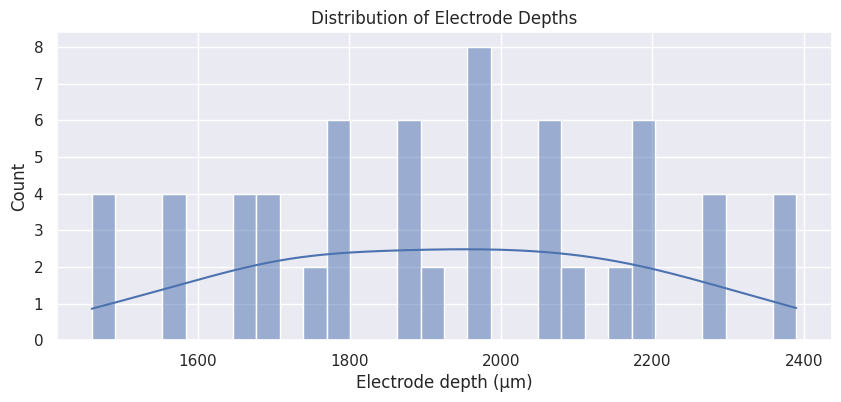

In [7]:
plt.figure(figsize=(10, 4))
sns.histplot(elec_df['depth'], bins=30, kde=True)
plt.xlabel('Electrode depth (µm)')
plt.ylabel('Count')
plt.title('Distribution of Electrode Depths')
plt.show()

## 7. Explore LFP data summary and quick visualization
This dataset contains LFP recordings with shape approximately (15 million samples × 64 channels, ~2500 Hz sampling).

To avoid large downloads and long wait times, we will fetch **first ~2 seconds** of data from a **few channels** as an illustration.

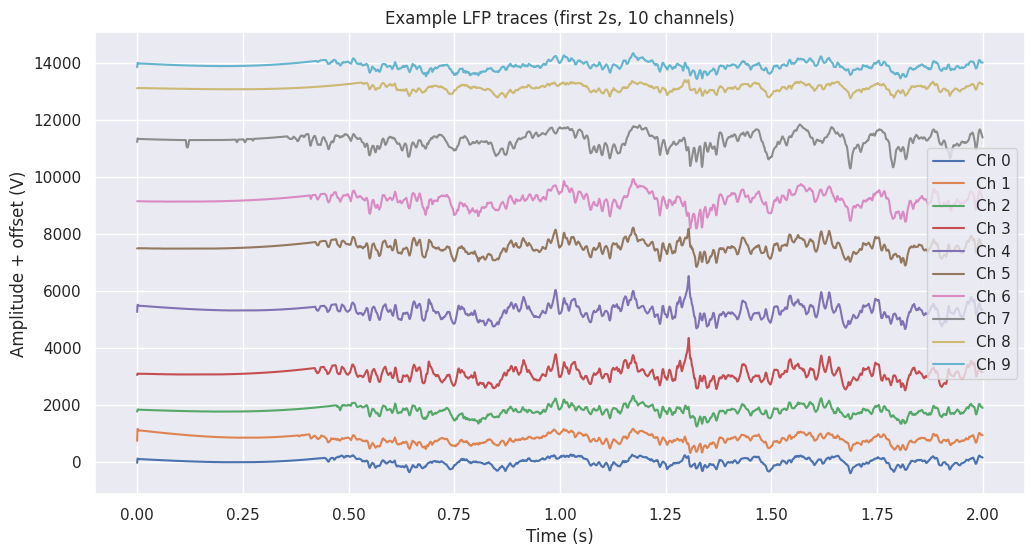

In [8]:
lfp = nwbfile.processing['ecephys'].data_interfaces['LFP']
rate = lfp.rate  # 2500 Hz
snippet_duration_seconds = 2
snippet_samples = int(rate * snippet_duration_seconds)

data = lfp.data

snippet = data[:snippet_samples, :10]  # first 2 seconds, first 10 channels
time = np.arange(snippet_samples) / rate

plt.figure(figsize=(12, 6))
offset = 0
for i in range(snippet.shape[1]):
    plt.plot(time, snippet[:, i] + offset, label=f'Ch {i}')
    offset += np.ptp(snippet[:, i]) * 1.2  # vertical offset between traces
plt.xlabel('Time (s)')
plt.ylabel('Amplitude + offset (V)')
plt.title('Example LFP traces (first 2s, 10 channels)')
plt.legend()
plt.show()

## 8. Explore experimental intervals (odor/presentation blocks)
The .intervals attribute holds behavioral and experimental event timing annotations.

In [9]:
for name, tbl in nwbfile.intervals.items():
    print(f"Interval: {name}")
    print("  Description:", tbl.description)
    print("  Columns:", tbl.colnames)

Interval: Block 1
  Description: Interval when Block 1 odors were being presented
  Columns: ('start_time', 'stop_time')
Interval: Block 2
  Description: Interval when Block 2 odors were being presented
  Columns: ('start_time', 'stop_time')
Interval: Block 3
  Description: Interval when Block 3 odors were being presented
  Columns: ('start_time', 'stop_time')
Interval: Odor A ON
  Description: Intervals when Odor A was being presented
  Columns: ('start_time', 'stop_time')
Interval: Odor B ON
  Description: Intervals when Odor B was being presented
  Columns: ('start_time', 'stop_time')
Interval: Odor C ON
  Description: Intervals when Odor C was being presented
  Columns: ('start_time', 'stop_time')
Interval: Odor D ON
  Description: Intervals when Odor D was being presented
  Columns: ('start_time', 'stop_time')
Interval: Odor E ON
  Description: Intervals when Odor E was being presented
  Columns: ('start_time', 'stop_time')
Interval: Odor F ON
  Description: Intervals when Odor F 

Plot: Timeline of odor block intervals

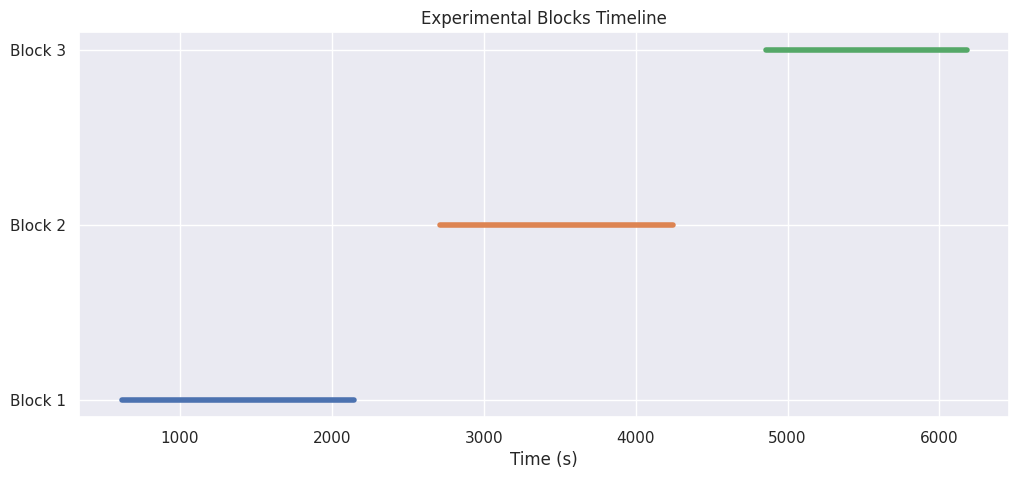

In [10]:
block_names = [k for k in nwbfile.intervals.keys() if 'Block' in k]
fig, ax = plt.subplots(figsize=(12, 2 + len(block_names)))
for idx, name in enumerate(block_names):
    tbl = nwbfile.intervals[name]
    df = tbl.to_dataframe()
    for _, row in df.iterrows():
        ax.plot([row['start_time'], row['stop_time']], [idx, idx], lw=4)
ax.set_yticks(range(len(block_names)))
ax.set_yticklabels(block_names)
ax.set_xlabel('Time (s)')
ax.set_title('Experimental Blocks Timeline')
plt.show()

## 9. Units table overview

In [11]:
units = nwbfile.units
print("Units table columns:", units.colnames)
units_df = units.to_dataframe()

units_df.head()

Units table columns: ('depth', 'hemisphere', 'global_id', 'spike_times', 'electrode_group', 'waveform_mean')


,depth,hemisphere,global_id,spike_times,electrode_group,waveform_mean
id,,,,,,
0,2165.0,Right,imec0.shank2.0,"[37.81426666666667, 61.86696666666667, 128.116...",imec0.shank2 pynwb.ecephys.ElectrodeGroup at 0...,"[225.46463, 260.01242, 332.29938, 403.57507, 4..."
1,2105.0,Right,imec0.shank2.3,"[0.7301333333333333, 2.5303333333333335, 3.210...",imec0.shank2 pynwb.ecephys.ElectrodeGroup at 0...,"[58.573048, 17.891602, 57.63457, 95.94258, 96...."
2,2105.0,Right,imec0.shank2.4,"[0.6016333333333334, 0.6984666666666667, 0.733...",imec0.shank2 pynwb.ecephys.ElectrodeGroup at 0...,"[219.52469, 236.98656, 290.52814, 313.91745, 3..."
3,2060.0,Right,imec0.shank2.5,"[104.753, 167.5465, 227.03383333333332, 261.29...",imec0.shank2 pynwb.ecephys.ElectrodeGroup at 0...,"[79.8753, 87.31267, 120.147705, 152.32779, 183..."
4,2045.0,Right,imec0.shank2.6,"[0.5149666666666667, 0.6066666666666667, 0.898...",imec0.shank2 pynwb.ecephys.ElectrodeGroup at 0...,"[147.22581, 186.98683, 222.2313, 213.65782, 25..."


Plot: Distribution of spike counts per unit (limited to first 50 units for speed)

/tmp/ipykernel_33056/147550107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_units['n_spikes'] = subset_units['spike_times'].apply(lambda x: len(x))


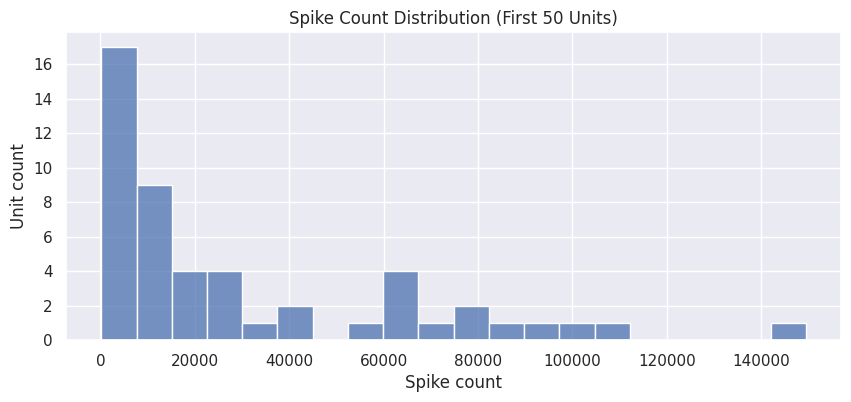

In [12]:
subset_units = units_df.head(50)
subset_units['n_spikes'] = subset_units['spike_times'].apply(lambda x: len(x))
plt.figure(figsize=(10,4))
sns.histplot(subset_units['n_spikes'], bins=20)
plt.xlabel('Spike count')
plt.ylabel('Unit count')
plt.title('Spike Count Distribution (First 50 Units)')
plt.show()

# End of notebook
This notebook serves as an initial exploration. You are encouraged to customize it and perform deeper analyses relevant to your research questions.